# Cool vs Warm Image Prediction

Cool colors are typically in the blue and green range (hue values between 90-180 in HSV), while warm colors are in the red, orange, and yellow range (hue values between 0-60).

In [1]:
import cv2
import numpy as np

def predict_cool_vs_warm(image_path):
    # Load the image and convert to HSV
    image = cv2.imread(image_path)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Get the hue channel (0 index)
    hue = image_hsv[:, :, 0]
    
    # Define warm (0-60) and cool (90-180) ranges
    warm_mask = (hue >= 0) & (hue <= 60)
    cool_mask = (hue >= 90) & (hue <= 180)
    
    print(hue.size)
    
    # Calculate the percentage of warm and cool pixels
    warm_percentage = np.sum(warm_mask) / hue.size * 100
    cool_percentage = np.sum(cool_mask) / hue.size * 100
    
    # Decide which is dominant
    if warm_percentage > cool_percentage:
        prediction = "Warm"
    else:
        prediction = "Cool"
    
    print(f"Warm Pixels: {warm_percentage:.2f}%")
    print(f"Cool Pixels: {cool_percentage:.2f}%")
    
    return prediction

predict_cool_vs_warm('./data/beach-blue.jpg')


540000
Warm Pixels: 4.47%
Cool Pixels: 84.25%


'Cool'

# Dull vs Bright Image Prediction

Dull images tend to have low saturation and value (brightness), while bright images have higher values for both. We can use thresholds to classify an image as dull or bright based on these properties.

In [2]:
def predict_dull_vs_bright(image_path):
    # Load the image and convert to HSV
    image = cv2.imread(image_path)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Get the saturation and value (brightness) channels
    saturation = image_hsv[:, :, 1]
    value = image_hsv[:, :, 2]
    
    # Define thresholds for dull (low saturation and brightness)
    dull_saturation_threshold = 80
    dull_value_threshold = 100
    
    # Calculate the percentage of dull pixels
    dull_mask = (saturation < dull_saturation_threshold) & (value < dull_value_threshold)
    dull_percentage = np.sum(dull_mask) / saturation.size * 100
    
    # Decide whether the image is dull or bright
    if dull_percentage > 50:  # If more than 50% of the image is dull
        prediction = "Dull"
    else:
        prediction = "Bright"
    
    print(f"Dull Pixels: {dull_percentage:.2f}%")
    
    return prediction

predict_dull_vs_bright('./data/beach-blue.jpg')

Dull Pixels: 0.48%


'Bright'

# Color Thresholding

Color thresholding allows you to filter specific colors from the image and create a mask out of it.

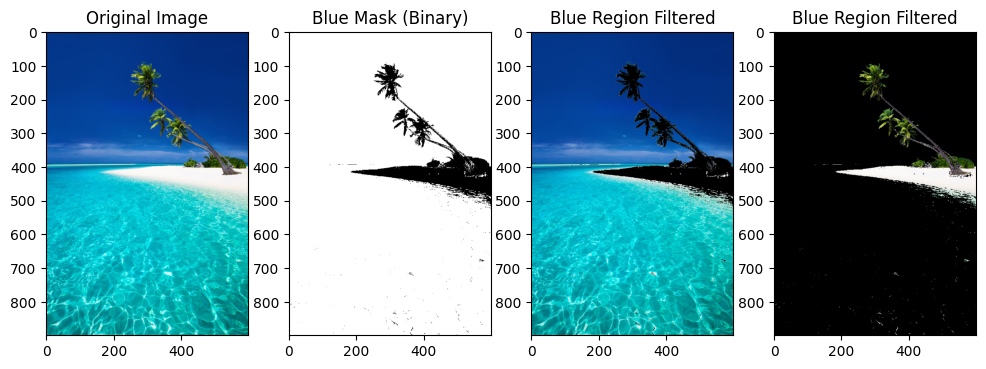

In [3]:
import matplotlib.pyplot as plt

lower_blue = np.array([80, 0, 50])
upper_blue = np.array([120, 255, 255]) 

image = cv2.imread('./data/beach-blue.jpg')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create mask and apply it
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)
# source image, second source image to perform the and operation with, mask that controls which pixels from the source images are used in the output.

res = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

mask_inv = cv2.bitwise_not(mask)
res2 = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_inv)
# mask is an optional binary mask. If provided, the operation is applied only to the pixels where the mask value is non-zero.

# Plot the mask to see the region detected and the result
plt.figure(figsize=(12, 6))

# Plot original image
# plt.subplot(nrows, ncols, index)

plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.grid(False)  # Turn off grid

# Plot the mask (binary image where white represents detected blue regions)
plt.subplot(1, 4, 2)
plt.imshow(mask, cmap='gray')
plt.title('Blue Mask (Binary)')
plt.grid(False)  # Turn off grid

# Plot the blue-filtered result
plt.subplot(1, 4, 3)
plt.imshow(res)
plt.title('Blue Region Filtered')
plt.grid(False)  # Turn off grid

# Plot the inv blue-filtered result
plt.subplot(1, 4, 4)
plt.imshow(res2)
plt.title('Blue Region Filtered')
plt.grid(False)  # Turn off grid

plt.show()

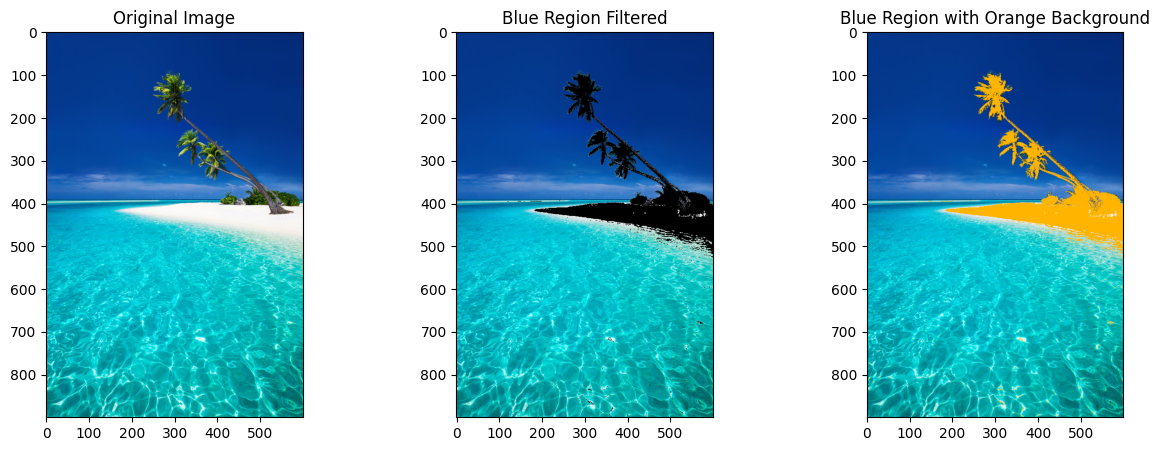

In [42]:
orange_image = np.zeros_like(image_rgb)
orange_image[:, :] = [255, 180, 0]

mask_inv = cv2.bitwise_not(mask)

orange_part = cv2.bitwise_and(orange_image, orange_image, mask=mask_inv)
#  keeps only the red regions in the areas where mask_inv is white

final_result = cv2.add(res, orange_part)

# Plot the original image, blue-filtered result, and final result
plt.figure(figsize=(15, 5))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.grid(False)  # Turn off grid

# Plot the blue-filtered result
plt.subplot(1, 3, 2)
plt.imshow(res)
plt.title('Blue Region Filtered')
plt.grid(False)  # Turn off grid

# Plot the final result (blue regions + orange background)
plt.subplot(1, 3, 3)
plt.imshow(final_result)
plt.title('Blue Region with Orange Background')
plt.grid(False)  # Turn off grid

plt.show()

# What is Contour?

Contour is a curve that connects all the continous points along the boundary of an object that have the same coloir or intensity.

or in-short : 

Contours are the boundaries of objects detected in an image.

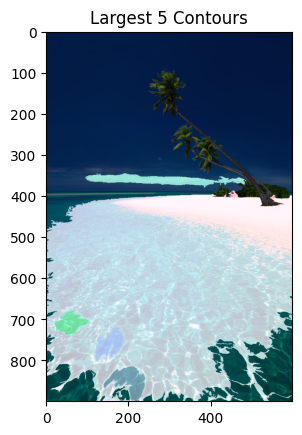

In [4]:
image = cv2.imread('./data/beach-blue.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
_, thresh = cv2.threshold(gray, 120, 180, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


# Create a mask for the filled contours
image_filled_contours = np.zeros_like(image)

# Sort contours by area and keep the largest ones
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:5]  # Only take the top 5 largest contours

# Draw contours
for contour in contours:
    color = (np.random.randint(100, 255), np.random.randint(100, 255), np.random.randint(100, 255))
    # color = (255, 0, 0)  # Static RGB color
    cv2.drawContours(image_filled_contours, [contour], -1, color, thickness=cv2.FILLED)

# Combine filled contours with the original image
# You can choose to overlay the filled contours on the original image or keep them separate
# cv2.addWeighted(src1, alpha, src2, beta, gamma)
# alpha is weightage of first image and beta is weightage of second image
# gamma is brightness added to final result.
image_with_filled_contours = cv2.addWeighted(image, 0.5, image_filled_contours, 0.8, 0.2)

plt.imshow(image_with_filled_contours)
plt.title("Largest 5 Contours")
plt.grid(False)
plt.show()

# Find Shapes and Bounding Boxes

You can use contour approximation to detect specific shapes like triangles or rectangles. Contour approximation in OpenCV simplifies the shape of a contour by reducing the number of vertices while retaining the overall shape of the contour.

In [5]:
def get_shape(contour):
    # Approximate the contour
    # approx = cv2.approxPolyDP(curve, epsilon, closed)
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    
    # Determine the shape based on the number of vertices
    if len(approx) == 3:
        shape = "Triangle"
    elif len(approx) == 4:
        # Check for rectangle or square
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        shape = "Square" if aspect_ratio == 1 else "Rectangle"
    elif len(approx) == 5:
        shape = "Pentagon"
    elif len(approx) == 6:
        shape = "Hexagon"
    elif len(approx) > 6:
        shape = "Polygon"
    else:
        shape = "Unknown"

    return (approx, shape)

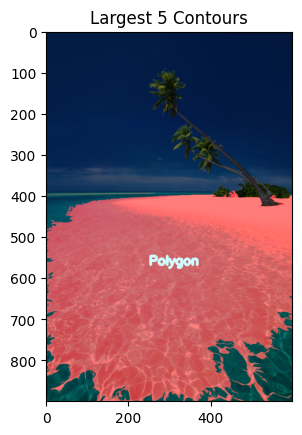

In [ ]:
image = cv2.imread('./data/beach-blue.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
_, thresh = cv2.threshold(gray, 120, 180, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


# Create a mask for the filled contours
image_filled_contours = np.zeros_like(image)

# Sort contours by area and keep the largest ones
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]  # Only take the top 5 largest contours

# Draw contours
for contour in contours:
    approx, shape = get_shape(contour)
    
    # color = (np.random.randint(100, 255), np.random.randint(100, 255), np.random.randint(100, 255))  # Random RGB color
    color = (255, 0 , 0)
    
    cv2.drawContours(image_filled_contours, [contour], -1, color, thickness=cv2.FILLED)
    
    # Calculate position for the text below the shape
    cx, cy = int(np.mean(approx[:, 0, 0])), int(np.mean(approx[:, 0, 1]))  # Calculate centroid
    text_position = (cx - 150, cy - 150)  # Move text down by 20 pixels
    
    cv2.putText(image_filled_contours, shape, (300,300), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 5)

# Combine filled contours with the original image
# You can choose to overlay the filled contours on the original image or keep them separate
# cv2.addWeighted(src1, alpha, src2, beta, gamma)
# alpha is weightage of first image and beta is weightage of second image
# gamma is brightness added to final result.
image_with_filled_contours = cv2.addWeighted(image, 0.5, image_filled_contours, 0.8, 1)

plt.imshow(image_with_filled_contours)
plt.title("Largest 5 Contours")
plt.grid(False)
plt.show()

# Find shapes and draw Bounding Boxes Around Contours

length of contour : 3197


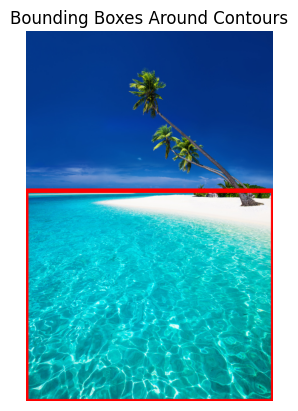

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./data/beach-blue.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image
_, thresh = cv2.threshold(gray, 120, 180, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area and keep the largest ones
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]  # Only take the top 5 largest contours

# Create a copy of the original image to draw on
image_with_bboxes = image.copy()

# Loop through each contour to draw bounding boxes
for contour in contours:
    print(f"length of contour : {len(contour)}")
    # Draw the bounding box around the contour
    x, y, w, h = cv2.boundingRect(contour)  # Get the bounding box coordinates
    cv2.rectangle(image_with_bboxes, (x, y), (x + w, y + h), (0, 0, 255), 10)  # Draw bounding box in yellow

# Display the result
plt.imshow(cv2.cvtColor(image_with_bboxes, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title("Bounding Boxes Around Contours")
plt.axis('off')  # Turn off axis
plt.show()
